# 🎵 Spotify & YouTube Data Analysis Project

This project performs an **Exploratory Data Analysis (EDA)** on a dataset combining metrics from **Spotify** and **YouTube**. The goal is to analyze the correlation between streaming numbers, views, likes, and comments, and to identify popular artists, tracks, and album types.

### 🎯 Project Objectives
* **Data Cleaning:** Handling missing values (`fillna`, `dropna`) and removing unnecessary columns (URL, URI).
* **Artist Analysis:** Identifying the top artists based on total views.
* **Track Analysis:** Finding the most and least streamed songs.
* **Album Analysis:** visualizing the distribution of album types (Single, Album, Compilation) using Pie Charts.
* **Channel Analysis:** Determining the most popular YouTube channels.
* **Engagement Analysis:** Calculating Like/View ratios to measure audience engagement.
* **Correlation:** Using Heatmaps to see how Views, Likes, Comments, and Streams are related.

### 🛠️ Key Techniques
* **Data Cleaning:** `drop()`, `fillna()`, `dropna()`.
* **Visualization:** `matplotlib.pyplot` (Pie, Bar), `seaborn` (Heatmap, Barplot).
* **Data Transformation:** `melt()` (Unpivoting data for plotting).
* **Aggregation:** `groupby()`, `sum()`, `mean()`.

## 1. Importing Libraries and Loading the Dataset
Loading the necessary libraries and the dataset to understand its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df= pd.read_csv("Spotify_Youtube_Dataset.csv")
df.head(2)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


## 2. Data Cleaning: Removing Unnecessary Columns
Dropping URL and URI columns that are not needed for statistical analysis.

In [3]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
df.drop(columns = ["Unnamed: 0","Url_spotify", "Uri","Url_youtube"],  inplace=True)

## 3. Data Preprocessing: Handling Missing Values
Checking for null values and handling them by filling with 0 or dropping rows to ensure data integrity.

In [6]:
df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [7]:
df["Likes"] = df["Likes"].fillna(0) #filling missing values

In [8]:
df["Comments"] = df["Comments"].fillna(0) #filling missing values

In [9]:
df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes                 0
Comments              0
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [10]:
df.dropna(inplace =True ) #permanently deleted kalıcı sildi

In [11]:
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19298 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19298 non-null  object 
 1   Track             19298 non-null  object 
 2   Album             19298 non-null  object 
 3   Album_type        19298 non-null  object 
 4   Danceability      19298 non-null  float64
 5   Energy            19298 non-null  float64
 6   Key               19298 non-null  float64
 7   Loudness          19298 non-null  float64
 8   Speechiness       19298 non-null  float64
 9   Acousticness      19298 non-null  float64
 10  Instrumentalness  19298 non-null  float64
 11  Liveness          19298 non-null  float64
 12  Valence           19298 non-null  float64
 13  Tempo             19298 non-null  float64
 14  Duration_ms       19298 non-null  float64
 15  Title             19298 non-null  object 
 16  Channel           19298 non-null  object 
 17

## 4. Artist Analysis: Top Performers
grouping data by 'Artist' to find out who has the highest total views.

In [13]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [14]:
Artist_grouped = df.groupby("Artist")["Views"].sum()
Artist_grouped 

Artist
$NOT              1.107849e+08
$uicideboy$       3.317202e+08
(G)I-DLE          1.754954e+09
*NSYNC            1.027833e+09
070 Shake         9.609936e+07
                      ...     
will.i.am         2.830801e+09
Ángela Aguilar    1.385295e+09
Ñejo              6.266808e+08
Ñengo Flow        8.127263e+08
Øneheart          3.462331e+07
Name: Views, Length: 2040, dtype: float64

In [15]:
Artist_sorted= Artist_grouped.sort_values(ascending =False)
Artist_sorted

Artist
Ed Sheeran          1.546021e+10
CoComelon           1.460167e+10
Katy Perry          1.312063e+10
Charlie Puth        1.216759e+10
Luis Fonsi          1.162811e+10
                        ...     
Teufelskicker       3.802800e+04
Brooks & Dunn       3.324600e+04
Thomas Karallus     2.519000e+04
Bibi Blocksberg     2.402000e+04
Simone & Simaria    8.375000e+03
Name: Views, Length: 2040, dtype: float64

In [16]:
Artist_sorted.head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

## 5. Track Analysis: Streaming Trends
Identifying the tracks with the highest and lowest stream counts to understand listener preferences.

In [17]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [18]:
x =df[["Track","Stream"]]
x

,Track,Stream
0,Feel Good Inc.,1.040235e+09
1,Rhinestone Eyes,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07
3,On Melancholy Hill,4.346636e+08
4,Clint Eastwood,6.172597e+08
...,...,...
20713,JUST DANCE HARDSTYLE,9.227144e+06
20714,SET FIRE TO THE RAIN HARDSTYLE,1.089818e+07
20715,OUTSIDE HARDSTYLE SPED UP,6.226110e+06
20716,ONLY GIRL HARDSTYLE,6.873961e+06


In [19]:
lowest_stream_track= x.sort_values( by =  ["Stream"] ,ascending=True).head(10)
lowest_stream_track

,Track,Stream
8701,Rainbows,6574.0
3774,We Play the Funk - Slynk Remix,7771.0
5161,Teil 9 - Sherlock Holmes und ein Brief von der...,8053.0
5160,Teil 10 - Sherlock Holmes und ein Brief von de...,8074.0
5159,Teil 5 - Sherlock Holmes und der blinde Bettle...,10306.0
5158,Teil 7 - Sherlock Holmes und der blinde Bettle...,10540.0
5157,Teil 11 - Sherlock Holmes und der blinde Bettl...,10660.0
5156,Teil 8 - Sherlock Holmes und der blinde Bettle...,10701.0
5155,Teil 6 - Sherlock Holmes und der blinde Bettle...,10710.0
5154,Teil 9 - Sherlock Holmes und der blinde Bettle...,10798.0


In [20]:
most_stream_track= x.sort_values( by =  ["Stream"] ,ascending =False).head(10)
most_stream_track

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16099,Closer,2.456205e+09
16028,Closer,2.456205e+09
14030,Believer,2.369272e+09


In [21]:

most_stream_track = x.nlargest(10, "Stream")
most_stream_track

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16028,Closer,2.456205e+09
16099,Closer,2.456205e+09
14030,Believer,2.369272e+09


## 6. Album Analysis: Distribution of Releases
Analyzing the types of albums (Album, Single, Compilation) and visualizing their distribution with a **Pie Chart**.

In [22]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [23]:
df["Album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [24]:
album_type=df["Album_type"].value_counts()
album_type



Album_type
album          13952
single          4653
compilation      693
Name: count, dtype: int64

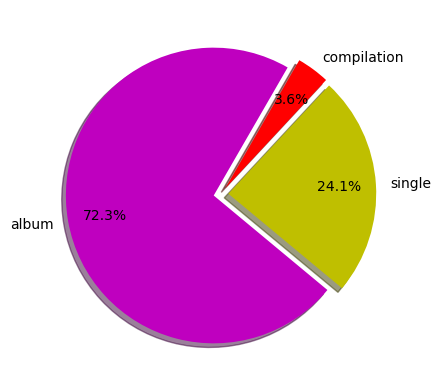

In [25]:
#draw a pie chart
plt.pie(album_type , labels=album_type.index , autopct = "%1.1f%%" , startangle=60 ,
        colors="myr" , shadow =True , explode  = (0.05,0.05,0.05) , pctdistance =0.75)
plt.show()

## 7. Advanced Visualization: Interaction Metrics by Album Type
Reshaping the data using `melt()` to compare Views, Likes, and Comments across different album types using a Bar Plot.

In [26]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [27]:
df1=df.groupby("Album_type")[["Views","Likes","Comments"]].mean()
df1

,Views,Likes,Comments
Album_type,,,
album,1.014359e+08,672593.609948,29032.951548
compilation,8.500535e+07,544275.818182,18074.903319
single,8.480843e+07,722266.303890,27313.048571


In [28]:
type(df1)

pandas.core.frame.DataFrame

In [29]:
df1 = df1.reset_index()

In [30]:
#melt -unpivot dataframe
df_melted =pd.melt(df1 ,id_vars="Album_type",var_name="Attribute",value_name ="Total")
df_melted

,Album_type,Attribute,Total
0,album,Views,1.014359e+08
1,compilation,Views,8.500535e+07
2,single,Views,8.480843e+07
3,album,Likes,6.725936e+05
4,compilation,Likes,5.442758e+05
5,single,Likes,7.222663e+05
6,album,Comments,2.903295e+04
7,compilation,Comments,1.807490e+04
8,single,Comments,2.731305e+04


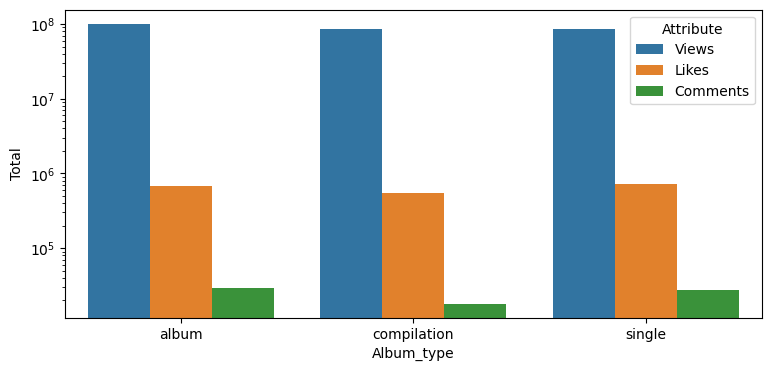

In [31]:
#draw the bar plot
plt.figure( figsize =(9,4))
sns.barplot(x="Album_type", y="Total",hue="Attribute", data=df_melted)
plt.yscale('log')
plt.show()


## 8. Channel Analysis: Top YouTube Channels
Identifying and visualizing the top 10 YouTube channels based on total views.

In [32]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [33]:
total_views=df.groupby("Channel")["Views"].sum().sort_values(ascending=False).head(10)
total_views

Channel
T-Series                      4.796159e+10
LuisFonsiVEVO                 2.170252e+10
CalvinHarrisVEVO              1.828114e+10
Macklemore                    1.700341e+10
Ed Sheeran                    1.691822e+10
Hear This Music               1.508851e+10
Cocomelon - Nursery Rhymes    1.460167e+10
Bruno Mars                    1.301357e+10
KatyPerryVEVO                 1.247680e+10
DJSnakeVEVO                   1.245510e+10
Name: Views, dtype: float64

In [34]:
total_views=total_views.reset_index()
total_views.head(10)

,Channel,Views
0,T-Series,4.796159e+10
1,LuisFonsiVEVO,2.170252e+10
2,CalvinHarrisVEVO,1.828114e+10
3,Macklemore,1.700341e+10
4,Ed Sheeran,1.691822e+10
5,Hear This Music,1.508851e+10
6,Cocomelon - Nursery Rhymes,1.460167e+10
7,Bruno Mars,1.301357e+10
8,KatyPerryVEVO,1.247680e+10
9,DJSnakeVEVO,1.245510e+10


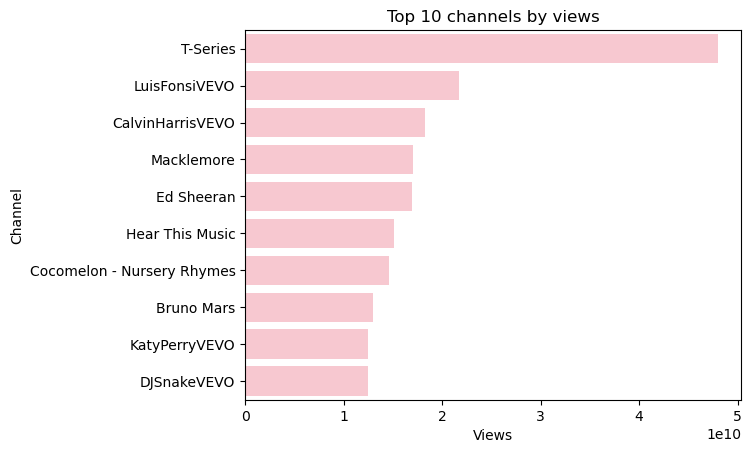

In [35]:

#sns.set_style("Whitegrid")
sns.barplot(y ="Channel", x="Views" ,data=total_views ,color="pink")
plt.title("Top 10 channels by views")
plt.xlabel("Views")
plt.ylabel("Channel")
plt.show()

## 9. Top Viewed Tracks
Identifying the individual tracks with the highest view counts on YouTube.

In [36]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [37]:
df.sort_values(by ="Views",ascending=False).head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.581,...,233713.0,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,The official music video for Ed Sheeran - Shap...,True,True,3.362005e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09


## 10. Engagement Metrics: Like/View Ratio
Creating a new metric to measure audience engagement by calculating the ratio of Likes to Views.

In [38]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [39]:
df1= df[["Track","Likes" ,"Views"]]
df1

,Track,Likes,Views
0,Feel Good Inc.,6220896.0,693555221.0
1,Rhinestone Eyes,1079128.0,72011645.0
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0
3,On Melancholy Hill,1788577.0,211754952.0
4,Clint Eastwood,6197318.0,618480958.0
...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0
20716,ONLY GIRL HARDSTYLE,88.0,6533.0


In [40]:
df1["Ratio"] = df1["Likes"] /df1["Views"] *100

C:\Users\deniz\AppData\Local\Temp\ipykernel_18848\2545563787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Ratio"] = df1["Likes"] /df1["Views"] *100


In [41]:
df1.head(2)

,Track,Likes,Views,Ratio
0,Feel Good Inc.,6220896.0,693555221.0,0.896958
1,Rhinestone Eyes,1079128.0,72011645.0,1.498547


In [42]:
df1.sort_values(by = "Ratio", ascending=False).head(10)

,Track,Likes,Views,Ratio
19968,Intro,237761.0,954081.0,24.920421
19969,Safety Zone,453910.0,1952637.0,23.246000
19967,Future,250116.0,1180522.0,21.186899
19971,Pandora's Box,253702.0,1265231.0,20.051832
16297,My Universe - Galantis Remix,371437.0,2067753.0,17.963316
15065,Burn It (feat. MAX),188244.0,1054438.0,17.852543
8105,No.2 (with parkjiyoon),346440.0,2050047.0,16.899125
14564,Bad Decisions (with BTS & Snoop Dogg),775430.0,4844158.0,16.007529
8104,Hectic (with Colde),305506.0,1910843.0,15.988022
19160,"TASTE (Lee Know, Hyunjin, Felix)",305000.0,2024369.0,15.066423


In [43]:
df1.sort_values(by = "Ratio",).head(10) #lowest ratio

,Track,Likes,Views,Ratio
15415,Whitehouse Road,0.0,53866517.0,0.0
13846,Womb Sound - Loopable with no fade,0.0,41.0,0.0
14348,From Liquid,0.0,770306.0,0.0
14346,I Want To Hurt Myself,0.0,433158.0,0.0
7404,Sin Tu Amor,0.0,5724478.0,0.0
3653,Omaha,0.0,950753.0,0.0
6922,Love So Sweet,0.0,48810691.0,0.0
15039,Love Tonight (Edit),0.0,8318071.0,0.0
3662,I Wish You Love,0.0,15356.0,0.0
15043,Love Tonight,0.0,8318071.0,0.0


## 11. Feature Analysis: Danceability
Finding the album with the highest cumulative 'Danceability' score to see which album is most suitable for dancing.

In [44]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [45]:
df.groupby("Album")["Danceability"].sum().sort_values(ascending=False).head(1)

Album
Greatest Hits    17.356
Name: Danceability, dtype: float64

## 12. Correlation Analysis: Heatmap
Using a Heatmap to visualize the correlation between Views, Likes, Comments, and Streams.

In [46]:
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [47]:
df1 = df[["Views","Likes","Comments","Stream"]]
df1

,Views,Likes,Comments,Stream
0,693555221.0,6220896.0,169907.0,1.040235e+09
1,72011645.0,1079128.0,31003.0,3.100837e+08
2,8435055.0,282142.0,7399.0,6.306347e+07
3,211754952.0,1788577.0,55229.0,4.346636e+08
4,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...
20713,71678.0,1113.0,0.0,9.227144e+06
20714,164741.0,2019.0,0.0,1.089818e+07
20715,35646.0,329.0,0.0,6.226110e+06
20716,6533.0,88.0,0.0,6.873961e+06


In [48]:
df1.corr()

,Views,Likes,Comments,Stream
Views,1.000000,0.891695,0.431077,0.603510
Likes,0.891695,1.000000,0.631035,0.655808
Comments,0.431077,0.631035,1.000000,0.267833
Stream,0.603510,0.655808,0.267833,1.000000


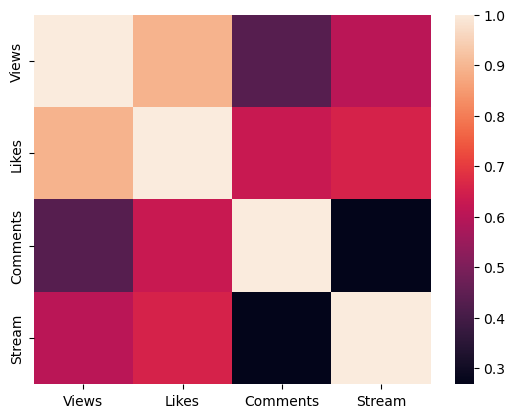

In [49]:
sns.heatmap(df1.corr())
plt.show()